In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\yellow_tripdata_2020-01.csv\yellow_tripdata_2020-01.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

In [5]:
df.shape

(6405008, 18)

In [6]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [7]:
#changing data type from object to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
#calculating duration of trip
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 
df['duration'] = df['duration'].dt.total_seconds()/60

In [9]:
#making a dataframe with columns that we would work with
df2 =df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
df2.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [10]:
#checking null values
df2.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [11]:
#checking percentage of data that is null
(65441/len(df2)) * 100

1.021716132126611

In [12]:
#dropping null values
df2.dropna(inplace = True)

In [13]:
#changing data type
df2['passenger_count'] = df2['passenger_count'].astype(int)
df2['payment_type'] = df2['payment_type'].astype(int)

In [14]:
#checking and dropping duplicate rows
df2[df2.duplicated()]
df2.drop_duplicates(inplace= True)

In [15]:
#checking distribution
df2['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [16]:
df2['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [17]:
#removing irrelevant rows
df2 = df2[df2['payment_type'] <3]
df2 = df2[(df2['passenger_count'] > 0)&(df['passenger_count']<7)]

In [18]:
#replacing values
df2['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

In [19]:
df2.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.898158e+06,2.898158e+06,2.898158e+06,2.898158e+06
mean,1.906919e+00,1.761232e+01,4.479349e+00,2.402879e+01
std,1.427756e+00,1.495772e+01,4.867743e+00,9.293099e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,8.500000e+00,1.470000e+00,9.716667e+00
50%,1.000000e+00,1.300000e+01,2.690000e+00,1.553333e+01
75%,2.000000e+00,2.100000e+01,5.370000e+00,2.318333e+01
max,6.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [20]:
#removing negative values which is not possible in this use case
df2 = df2[df2['fare_amount']>0]
df2 = df2[df2['trip_distance']>0]
df2 = df2[df2['duration']>0]

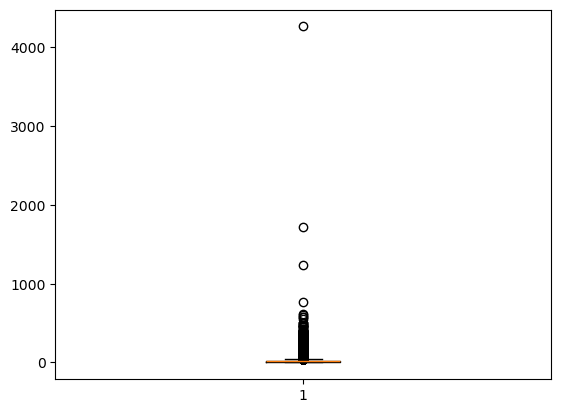

In [21]:
#finding outliers
plt.boxplot(df2['fare_amount'])
plt.show()

In [22]:
#removing outliers using IQR
for col in ['fare_amount','trip_distance','duration']:
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df2 = df2[(df2[col]> lower_bound)&(df2[col]<upper_bound)]

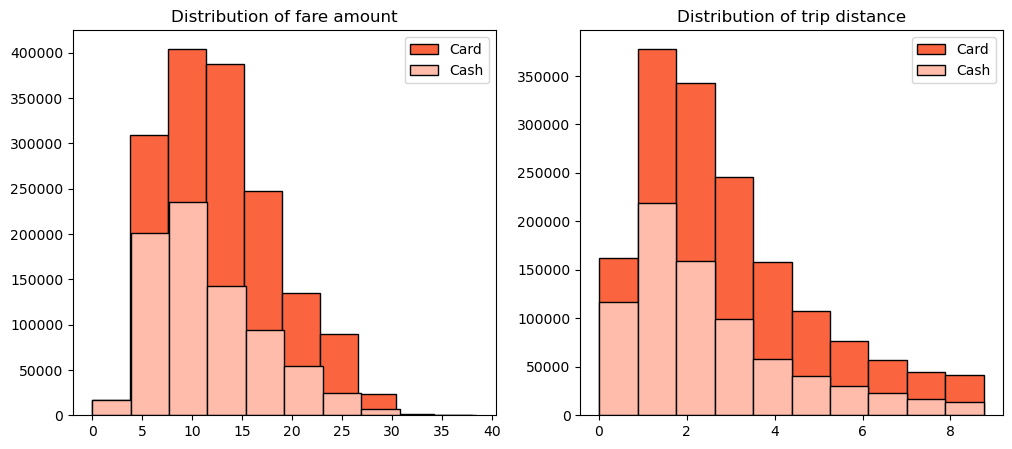

In [23]:
#Visualzing distribution of fare amount and trip distance by payment type
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df2[df2['payment_type']=='Card'] ['fare_amount'],label = 'Card', edgecolor='k', color = '#FA643F') 
plt.hist(df2[df2['payment_type']=='Cash'] ['fare_amount'],label= 'Cash',edgecolor='k', color = '#FFBCAB')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df2[df2['payment_type']=='Card'] ['trip_distance'],label = 'Card', edgecolor='k', color = '#FA643F') 
plt.hist(df2[df2['payment_type']=='Cash'] ['trip_distance'],label= 'Cash',edgecolor='k', color = '#FFBCAB')
plt.legend()

plt.show()

In [24]:
#Mean and std of fare amount and trip distance by payment type
df2.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.890296  5.742625      2.918838  1.939944
Cash           11.611093  5.517206      2.552948  1.867719

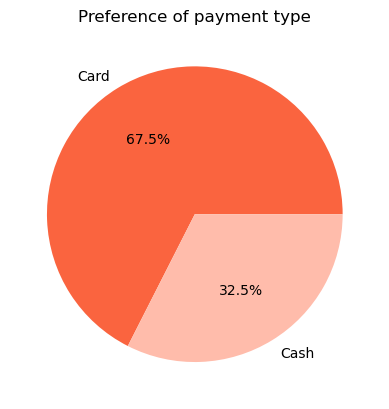

In [25]:
plt.title('Preference of payment type')
plt.pie(df2['payment_type'].value_counts(normalize = True), labels= df2['payment_type'].value_counts().index,
        autopct='%1.1f%%', colors= ['#FA643F','#FFBCAB'])
plt.show()

In [26]:
pc=df2.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
pc.rename(columns = {'passenger_count': 'count'},inplace = True)
pc.reset_index(inplace = True)
pc['perc']= (pc['count']/pc['count'].sum())*100
pc

,payment_type,passenger_count,count,perc
0,Card,1,901602,37.707919
1,Card,2,326147,13.640525
2,Card,3,122000,5.102436
3,Card,4,63469,2.654479
4,Card,5,123627,5.170482
5,Card,6,77496,3.241134
6,Cash,1,457907,19.151155
7,Cash,2,154875,6.477375
8,Cash,3,54343,2.272800
9,Cash,4,32614,1.364023


In [27]:
df3 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5,6])
df3['payment_type']= ['Card','Cash']
df3.iloc[0,1:] = pc.iloc[0:6,-1]
df3.iloc[1,1:] = pc.iloc[6:12,-1]

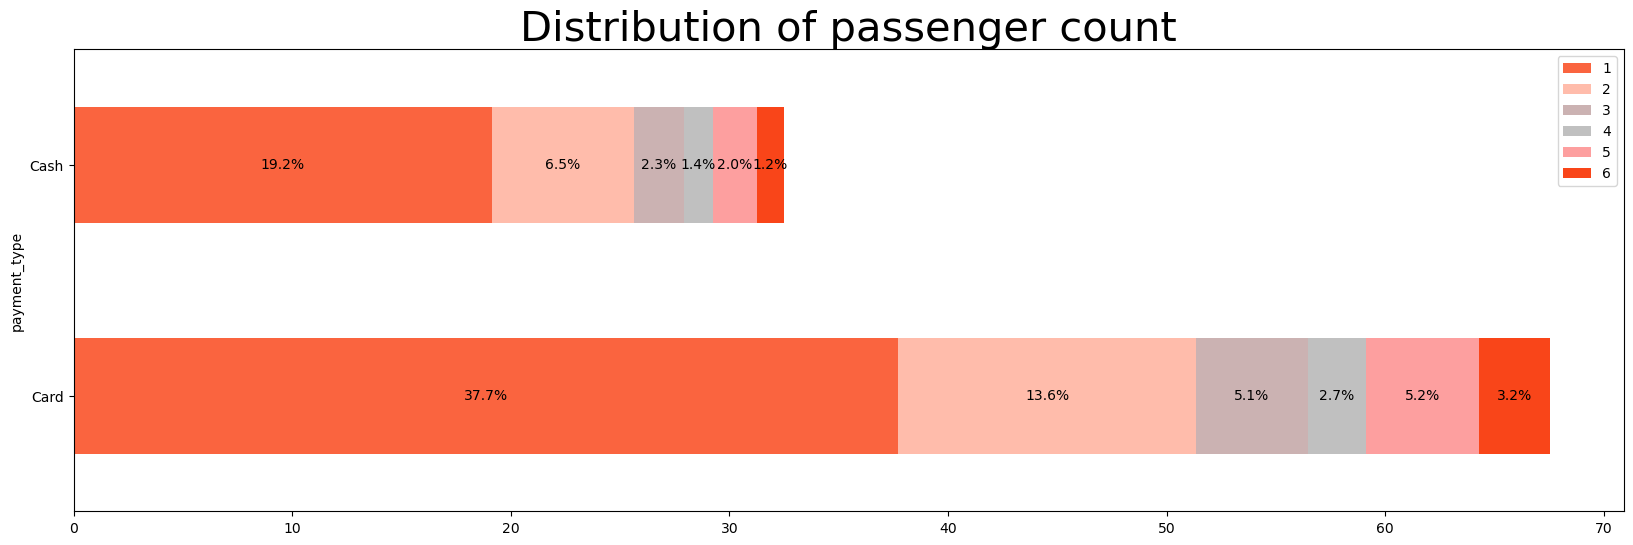

In [81]:
fig,ax=plt.subplots(figsize=(20,6))
df3.plot(x='payment_type', kind='barh',stacked= True,ax=ax,title='Distribution of passenger count', color= ['#FA643F', '#FFBCAB', '#CBB2B2','#C0C0C0','#FD9F9F','#f94519'])
ax.title.set_size(30)
#Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x+ width/2, y+height/2,'{:.1f}%'.format(width), horizontalalignment='center',verticalalignment='center')

# Hypothesis Testing

**Null hypothesis** : There is no difference between customers who use credit cards and customers who use cash.

**Alternative hypothesis** : There is a difference between customers who use credit cards and customers who use cash.

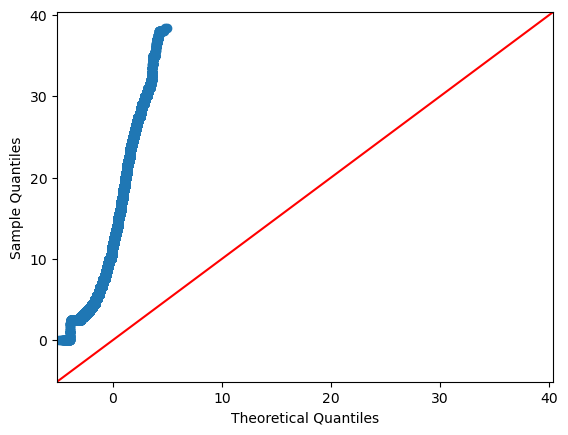

In [31]:
#plotting qq plot to check nature of distribution
sm.qqplot(df2['fare_amount'],line='45')
plt.show()

In [32]:
card_sample = df2[df2['payment_type']=='Card']['fare_amount']
cash_sample = df2[df2['payment_type']=='Cash']['fare_amount']


In [33]:
t_stats,p_value = st.ttest_ind(a = card_sample, b=cash_sample, equal_var = False)
print('T statistic', t_stats, 'p-value', p_value)

T statistic 165.6696783796064 p-value 0.0


### P-value is 0.0 which is less than 0.05 and is statistically significant. Therefore, we can reject the Null hypothesis and accept the Alternative hypothesis.

# Inferences

*1.Customers paying with card tend to have slightly higher average trip distance and fare amount indicating that customers prefer card when they have high fare amount and long trip distance.*

*2.Proportion of customers paying with card(67.5%) is significantly higher than those paying in cash(32.5%).*

*3.Single passenger rides make up the highest proportion of card transactions(37.7%) and cash transactions(19.2%).*

*4.Hypothesis testing indicates there is a significant difference between average fare and payment type.*